# Actividad Guiada 1 {-}
# Asier Llano  {-}
Link repostorio github:
[https://github.com/asierllano/03MIAR---Algoritmos-de-Optimizacion---2023]

# Torres de Hanoi

Esta aplicación consiste en hacer una aplicación que solucione el problema de las torres de Hanoi.
He hecho la solución muy similar a la presentada en la clase, con las siguientes mejoras menores:
 * En vez de limitar para N=1 he limitado para N=0 para no tener que realizar el movimiento para N=1 también
 * No he pasado el pivote porque hay que tener en cuenta que origen + destino + pivote = 6 siempre.
 * En vez de imprimir texto, he creado un generador en python, para que el resultado sea iterable y así
   se puede utilizar los movimientos para cualquier aplicación, no solamente escribir el texto.
 * Incluidos parámetros por defecto, porque tradicionalmente el problema de las torres de Hanoi
   empieza en la primera columna y termina en la última.

In [5]:
# Función que devuelve un iterador con los movimientos
# que soluciona las torres de Hanoi
def torres_hanoi(N, origen=1, destino=3):
    if N > 0:
        pivote = 6 - origen - destino
        yield from torres_hanoi(N-1, origen, pivote)
        yield (origen, destino)
        yield from torres_hanoi(N-1, pivote, destino)

Realizamos dos aplicaciones diferentes, una que muestra los movimientos para N=4 y otra que cuenta los movimientos necesarios para diferentes valores de N

In [6]:
# Pinta los movimientos para N=4
print("MOVIMIENTOS PARA N=4")
movimiento = 1
for (origen, destino) in torres_hanoi(4):
    print(f"{movimiento}. Muevo disco de {origen} a {destino}")
    movimiento+=1
    
# Comprueba el número de movimientos para diferentes valores de N
print()
print("NUMERO DE MOVIMIENTOS")
for N in range(1,21):
    movimientos = len(list(torres_hanoi(N)))
    print(f"N={N} requiere {movimientos} movimientos")


MOVIMIENTOS PARA N=4
1. Muevo disco de 1 a 2
2. Muevo disco de 1 a 3
3. Muevo disco de 2 a 3
4. Muevo disco de 1 a 2
5. Muevo disco de 3 a 1
6. Muevo disco de 3 a 2
7. Muevo disco de 1 a 2
8. Muevo disco de 1 a 3
9. Muevo disco de 2 a 3
10. Muevo disco de 2 a 1
11. Muevo disco de 3 a 1
12. Muevo disco de 2 a 3
13. Muevo disco de 1 a 2
14. Muevo disco de 1 a 3
15. Muevo disco de 2 a 3

NUMERO DE MOVIMIENTOS
N=1 requiere 1 movimientos
N=2 requiere 3 movimientos
N=3 requiere 7 movimientos
N=4 requiere 15 movimientos
N=5 requiere 31 movimientos
N=6 requiere 63 movimientos
N=7 requiere 127 movimientos
N=8 requiere 255 movimientos
N=9 requiere 511 movimientos
N=10 requiere 1023 movimientos
N=11 requiere 2047 movimientos
N=12 requiere 4095 movimientos
N=13 requiere 8191 movimientos
N=14 requiere 16383 movimientos
N=15 requiere 32767 movimientos
N=16 requiere 65535 movimientos
N=17 requiere 131071 movimientos
N=18 requiere 262143 movimientos
N=19 requiere 524287 movimientos
N=20 requiere 10485

# Devolución de cambio

Esta aplicación realiza la devolución de cambio en base a un sistema monetario. Es un código muy similar al realizado en clase con las siguientes mejoras:
* Permite sistemas monetarios no ordenados
* Utiliza división de enteros, en vez de división en coma flotante y después extraer la parte entera.
* En vez de pintar el resultado es un generador iterable con las monedas y su cantidad para poder utilizarlo en cualquier tipo de aplicaciones.
* En vez de sumar la cantidad hasta llegar al total, lo va restando del total, lo que simplifica el cálculo.
* Proporciona una excepción si no se ha podido devolver el cambio

In [7]:
# Función que devuelve el cambio de moneda basado en un sistema monetario
def cambio_moneda(total, sistema):
    for moneda in sorted(sistema, reverse = True):
        cantidad = total // moneda
        if cantidad != 0:
            yield (moneda, cantidad)
        total -= cantidad * moneda
    if total != 0:
        raise ValueError("No es posible devolver este cambio")

In [8]:
# Aplicación que devuelve el cambio de 54
print("El cambio de 54 es:")
for (moneda, cantidad) in cambio_moneda(54, [25, 1, 10, 5]):
    print(f" * {cantidad} monedas de {moneda}")

El cambio de 54 es:
 * 2 monedas de 25
 * 4 monedas de 1


# Encontrar los dos puntos más cercanos

Dado un conjunto de puntos devolver los puntos más cercanos en 1D, 2D, 3D...
Empezar utilizando fuerza bruta y optimizarlo de forma recursiva

## Implementación por fuerza bruta

La implementación por fuerza bruta requiere probar todas las parejas de números diferentes.

Hay que tener en cuenta que para $n$ puntos, hay un total de $\frac{n·(n-1)}{2}$ parejas. Por eso el algoritmo es $O(n^2)$

In [9]:
import random
import math

# Calcula la distancia entre puntos
def distancia_sq(a,b):
    result = 0
    for i in range(len(a)):
        d = a[i] - b[i]
        result += d*d
    return result

# Genero una lista de puntos aleatoria
def puntos_aleatorios(number, dimensions):
    return [tuple(random.randrange(1,10000) for d in range(dimensions)) \
            for i in range(number)]

#  Dado un conjunto de puntos calcula los más cercanos por fuerza bruta
def puntos_cercanos_fuerza_bruta(puntos):
    if len(puntos) < 2:
        raise ValueError("No se puede calcular la distancia entre puntos si no hay 2")
    d_mejor = distancia_sq(puntos[0], puntos[1])
    resultado = (puntos[0], puntos[1])
    for i in range(2,len(puntos)):
        for j in range(i):
            d = distancia_sq(puntos[i], puntos[j])
            if d_mejor > d:
                d_mejor = d
                resultado = (puntos[i], puntos[j])
    return resultado

Probamos el resultado para 3D con 5 elementos:

In [10]:
puntos=puntos_aleatorios(5,3)
cercanos=puntos_cercanos_fuerza_bruta(puntos)
print(f"Puntos más cercanos: {cercanos} en:")
for p in puntos:
    print(f" * {p}")

Puntos más cercanos: ((2939, 4938, 5317), (3201, 5277, 2511)) en:
 * (6685, 2371, 8036)
 * (7473, 7098, 5627)
 * (5511, 8391, 9256)
 * (3201, 5277, 2511)
 * (2939, 4938, 5317)


## Implementación recursiva

Después de bucear en la bibliografía el mejor algoritmo recursivo que he encontrado (y entendido) es el publicado por Khuller and Matias en 1995: https://www.cs.umd.edu/~samir/grant/cp.pdf

Lo he encontrado por la entrada de la Wikipedia en inglés de este problema:
https://en.wikipedia.org/wiki/Closest_pair_of_points_problem#Linear-time_randomized_algorithms

Este algoritmo está muy bien explicado en el artículo y muy bien resumido en la entrada de la Wikipedia. Además, tiene la particularidad de funcionar en cualquier número de dimensiones.

Los pasos son para encontrar la distancia mínima entre dos puntos de un conjunto $S$:

0. Inicializar $S_1$ para que sea $S$ e $i=1$
1. Elegir un punto $p_i$ al azar de la colección $S_i$, computar la distancia entre $p_i$ y todo el resto de los puntos de $S_i$. Llamaremos $d_i$ a esa distancia mínima.
2. Construir una malla de paso $\frac{d}{2\sqrt{k}}$ (esta es la generalización para el caso N-dimensional donde $k$ es el número de dimensiones). Crear un $S_{i+1}=S_i-X_i$ donde $X_i$ es el conjunto de puntos que no tienen vecinos en una vecindad de Moore.
3. Si $S_{i+1}=\emptyset$ entonces $i=i+1$ e ir al paso 1, sino entonces continuar al paso 4.
4. Construir un mallado de $S$ (el original), de paso $d_i$. Para cada punto calcular la distancia con sus vecinos y elegir el mínimo.

La complejidad del algoritmo es $O(n)$ por el hecho de que estadísticamente en el paso 2 se eliminan la mayoría de puntos y la colección decrece geométricamente, por lo que el tiempo que domina es el de la primera iteración. 

Se recomienda ver el artículo para más detalle.

In [11]:
# Calcula la distancia entre puntos
#   a: Primer punto para calcular la distancia
#   b: Segundo punto para calcular la distancia
def distancia(a,b):
    result = 0
    for i in range(len(a)):
        d = a[i] - b[i]
        result += d*d
    return math.sqrt(result)

# Infinitio utilizado como distancia máxima
infinito = float("inf")    

# Dada una colección de puntos devuelve el punto más cercano a uno dado
#   p:        Punto para calcular su más cercano
#   puntos:   Lista de pntos para obtener el mas cercano
# devuelve: (p2, distancia)
#   Tupla con el punto p2 y la distancia, que son los más cercanos a p.
def punto_mas_cercano(p, puntos):
    min_distancia = infinito
    min_punto = None
    for punto in puntos:
        if p is punto:
            continue
        d = distancia(p, punto)
        if d < min_distancia:
            min_distancia = d
            min_punto = punto
    return (min_punto, min_distancia)

# Dado un conjunto de puntos encasillarlos en una malla dado un intervalo
#   puntos: Lista de puntos
#   intervalo: Intervalo entre los puntos
def puntos_a_malla(puntos, intervalo):
    malla = {}
    for p in puntos:
        # Obten las coordenadas en la malla
        c = tuple(int(x // intervalo) for x in p)
        # Si es el primer punto, crea la casilla en la malla
        if c not in malla:
            malla[c] = [p]
            continue
        # Sino, añade el punto a la lista de la malla
        malla[c].append(p)
    return malla

# Generador que devulve las coordenadas de los vecinos
#   coor: Coordenadas del centro
# Nota: El generador es bastante complicada para funcionar de forma
#       n-dimensional encontrando todos los vecinos
def vecinos(coor):
    # Inicializa sin puntos encontrados y las coordenadas de la actual -2 en
    # todas las dimensiones
    result=[]    
    num = 0
    c=[x-1 for x in coor]
    # Recorre todas las casillas
    while True:
        # Acumula los vecinos en las coordenadas actuales (si ya ha encontrado
        # más de 1 para)
        yield tuple(c)
        # Pasa a la siguiente casilla
        i = 0
        while True:
            # Si no hay más casillas, no hemos encontrado vecinos
            # (comprobamos que al menos hemos encontrado 1)
            if i == len(c):
                return
            # Pasa a la siguiente casilla, o a la siguiente dimension
            c[i] += 1
            if c[i] <= coor[i] + 1:
                break
            c[i] = coor[i] - 1
            i += 1
            
# Consigue si hay vecinos en el entorno de una coordenada dada
#   malla: Malla de puntos
#   coor:  Coordenadas enteras dentro de la malla
# devuelve: True si hay vecinos, False si no hay vecinos
def vecinos_any(malla, coor):
    num = 0
    for v in vecinos(coor):
        if v in malla:
            num += len(malla[v])
            if num > 1:
                return True
    assert(num==1)
    return False

# Consigue todos los vecinos de Moore a un punto dado
#   malla: Malla de puntos
#   coor:  Coordenadas enteras dentro de la malla
# devuelve: la lista de vecinos
def vecinos_lista(malla, coor):
    result = []
    for v in vecinos(coor):
        if v in malla:
            result += malla[v]
    return result
    
# Consigue la distancia mínima usando el algoritmo de Khuller and Matias 1995
#   puntos: Lista de puntos, cada punto siendo una tupla de la dimensión deseada
# devuelve: (p1, p2)
#   tupla con los puntos 
def puntos_cercanos(puntos):
    # El algoritmos se plantea recursivo, eliminando puntos y repitiendo
    # con el resultado, pero con un bucle lo convertimos en iterativo
    s = puntos
    while True:
        # Paso 1: Elige un punto al azar y compunta la mínima distancia a todo
        #         el conjunto
        randindex = random.randint(0,len(s)-1)
        p1 = s[randindex]
        (p2, d) = punto_mas_cercano(p1, s)
        # Si la distancia ya es nula, entonces eso no se puede mejorar
        if math.isclose(d, 0):
            return (p1, p2)
        # Paso 2: Realizamos un mallado y elimina los que no tienen vecinos
        intervalo = d/(2*math.sqrt(len(p1)))
        malla = puntos_a_malla(s, intervalo)
        filtrado = []
        for (coor, p) in malla.items():
            if vecinos_any(malla, coor):
                filtrado += p
        # Paso 3: Condición de bucle y parada
        if len(filtrado) == 0:
            break
        s = filtrado
    # Paso 4: 
    intervalo = d
    malla = puntos_a_malla(puntos, intervalo)
    for (coor, p) in malla.items():
        if vecinos_any(malla, coor):
            v = vecinos_lista(malla, coor)
            for punto in p:
                (vp, vd) = punto_mas_cercano(punto, v)
                if vd < d:
                    p1 = punto
                    p2 = vp
                    d = vd
    # Devuelve el resultado
    return (p1, p2)

### Coprobación del correcto funcionamiento del algoritmo

Comprobamos con 100 ejemplos de un número aleatorio de puntos (entre 2 y 500), de un número aleatorio de dimensiones (entre 1 y 6) que la distancia por fuerza bruta y la distancia por el algoritmo Khuler-and-Matias dan el mismo resultado.

In [12]:
for i in range(100):
    puntos=puntos_aleatorios(random.randint(2,500),random.randint(1,6))
    cercanos=puntos_cercanos_fuerza_bruta(puntos)
    cercanos2=puntos_cercanos(puntos)
    d=distancia(cercanos[0], cercanos[1])
    d2=distancia(cercanos2[0], cercanos2[1])
    assert(math.isclose(d,d2))


### Comprobación del rendimiento del algoritmo

Vamos a hacer una gráfica del tiempo que tarda en ejecutarse el algoritmo en funciónd el número de nodos tanto para el caso de fuerza bruta como para el caso del algoritmo Khuler-and-Matias. Así comprobaremos que uno es $O(n^2)$ y el otro es $O(n)$.

Dimensiones: 1D
  puntos: 10 tiempo: 1.3742180317921749e-05 s (1.3742180317921748e-07*n^2 s)
  puntos: 20 tiempo: 4.3170123512483764e-05 s (1.0792530878120941e-07*n^2 s)
  puntos: 50 tiempo: 0.00023920853414981648 s (9.568341365992659e-08*n^2 s)
  puntos: 100 tiempo: 0.0009748836180237545 s (9.748836180237546e-08*n^2 s)
  puntos: 200 tiempo: 0.003873265499714762 s (9.683163749286905e-08*n^2 s)
  puntos: 500 tiempo: 0.024354862202017102 s (9.74194488080684e-08*n^2 s)
  puntos: 1000 tiempo: 0.10019551750447135 s (1.0019551750447136e-07*n^2 s)
  puntos: 2000 tiempo: 0.43747178800113035 s (1.0936794700028259e-07*n^2 s)
  puntos: 3000 tiempo: 0.9272270420042332 s (1.0302522688935925e-07*n^2 s)
  puntos: 4000 tiempo: 1.5970952630013926 s (9.981845393758703e-08*n^2 s)
  puntos: 5000 tiempo: 2.5215500670019537 s (1.0086200268007815e-07*n^2 s)
Dimensiones: 2D
  puntos: 10 tiempo: 1.2751900997479445e-05 s (1.2751900997479445e-07*n^2 s)
  puntos: 20 tiempo: 5.474444819647685e-05 s (1.368611204911

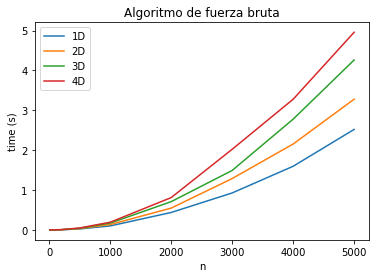

In [13]:
import timeit
import matplotlib.pyplot as plt
x = [10, 20, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]
y = {}
for dim in [1, 2,3,4]:
    print(f"Dimensiones: {dim}D")
    ydim = []
    for num in x:
        sets = 10 if num < 3000 else 1
        reps = 1000*1000//(sets*num*num)+1
        t_avg = 0
        for r in range(sets):
            puntos=puntos_aleatorios(num,dim)
            t = timeit.timeit(lambda:puntos_cercanos_fuerza_bruta(puntos),\
                              number=reps)
            t_avg += t
        t_avg /= sets*reps
        ydim.append(t_avg)
        k = t_avg / (num*num)
        print(f"  puntos: {num} tiempo: {t_avg} s ({k}*n^2 s)")
    y[dim] = ydim
plt.plot(x,y[1],x,y[2],x,y[3],x,y[4])
plt.xlabel("n")
plt.ylabel("time (s)")
plt.title('Algoritmo de fuerza bruta')
plt.legend(["1D", "2D", "3D", "4D"])
plt.show()

Se comprueba con los valores númericos y con las gráficas su rendimiento $O(n)$.

Dimensiones: 1D
  puntos: 500 tiempo: 0.002376148200710304 s (4.752296401420608e-06*n s)
  puntos: 1000 tiempo: 0.004117845805012621 s (4.117845805012621e-06*n s)
  puntos: 2000 tiempo: 0.002908681600820273 s (1.4543408004101365e-06*n s)
  puntos: 5000 tiempo: 0.006075775998760946 s (1.2151551997521892e-06*n s)
  puntos: 10000 tiempo: 0.006399782799417153 s (6.399782799417152e-07*n s)
  puntos: 20000 tiempo: 0.010885689000133425 s (5.442844500066713e-07*n s)
  puntos: 50000 tiempo: 0.01325691319652833 s (2.651382639305666e-07*n s)
  puntos: 100000 tiempo: 0.02517946320294868 s (2.5179463202948683e-07*n s)
Dimensiones: 2D
  puntos: 500 tiempo: 0.003592781798215583 s (7.185563596431166e-06*n s)
  puntos: 1000 tiempo: 0.007404338603373617 s (7.404338603373617e-06*n s)
  puntos: 2000 tiempo: 0.014772387998527847 s (7.386193999263923e-06*n s)
  puntos: 5000 tiempo: 0.04049753399740439 s (8.099506799480877e-06*n s)
  puntos: 10000 tiempo: 0.08951660280290526 s (8.951660280290526e-06*n s)
  p

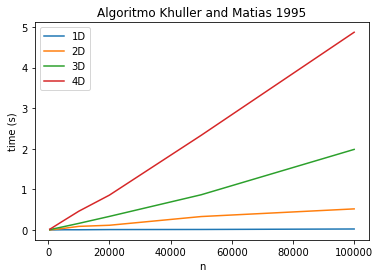

In [14]:
import timeit
import matplotlib.pyplot as plt
x = [500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
y = {}
for dim in [1,2,3,4]:
    print(f"Dimensiones: {dim}D")
    ydim = []
    for num in x:
        sets = 10 if num < 100 else 5
        reps = 1000*1000//(sets*num*num)+1
        t_avg = 0
        for r in range(sets):
            puntos=puntos_aleatorios(num,dim)
            t = timeit.timeit(lambda:puntos_cercanos(puntos), number=reps)
            t_avg += t
        t_avg /= sets*reps
        ydim.append(t_avg)
        k = t_avg / num
        print(f"  puntos: {num} tiempo: {t_avg} s ({k}*n s)")
    y[dim] = ydim
plt.plot(x,y[1],x,y[2],x,y[3],x,y[4])
plt.xlabel("n")
plt.ylabel("time (s)")
plt.title('Algoritmo Khuller and Matias 1995')
plt.legend(["1D", "2D", "3D", "4D"])
plt.show()

Se comprueba con los valores númericos y con las gráficas su rendimiento $O(n)$. Nótese no obstante que el rendimiento sí es lineal con respecto al número de puntos, pero con respecto a las dimensiones es exponencial. Esto se debe en la búsqueda de los vecinos de Moore, que hay que tener en cuenta que son $3^k$ vecinos, siendo $k$ el número de dimensiones. No obstante, el algoritmo nunca estuvo diseñado para $k$ siendo muy grande, sino para $n$ siendo muy grande. Aún así, el rendimeinto es muy superior que el rendimiento por fuerta bruta excepto para $n$ extremadamente pequeño o $k$ (dimensión) muy grande.